In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
#DATA PREPARATION

#You can change your path accordingly
data_2018 = pd.read_csv('/content/drive/MyDrive/MAN456/hw1/dataset/2018.csv', delimiter=';')
data_2019 = pd.read_csv('/content/drive/MyDrive/MAN456/hw1/dataset/2019.csv', delimiter=';' )
data_2020 = pd.read_csv('/content/drive/MyDrive/MAN456/hw1/dataset/2020.csv', delimiter=';')
data_2021 = pd.read_csv('/content/drive/MyDrive/MAN456/hw1/dataset/2021.csv', delimiter=';')
data_2022 = pd.read_csv('/content/drive/MyDrive/MAN456/hw1/dataset/2022.csv', delimiter=';')
data_2023 = pd.read_csv('/content/drive/MyDrive/MAN456/hw1/dataset/2023.csv', delimiter=';')


In [76]:
dataset = pd.concat([data_2018, data_2019, data_2020, data_2021, data_2022,data_2023], axis=0)


In [77]:
dataset

,Tarih,Saat,PTF (TL/MWh),PTF (USD/MWh),PTF (EUR/MWh)
0,01.01.2018,00:00,"207,60","55,04","45,97"
1,01.01.2018,01:00,"205,34","54,44","45,47"
2,01.01.2018,02:00,"164,94","43,73","36,53"
3,01.01.2018,03:00,"154,52","40,97","34,22"
4,01.01.2018,04:00,"112,64","29,86","24,95"
...,...,...,...,...,...
8755,31.12.2023,19:00,"2.499,67","84,91","76,74"
8756,31.12.2023,20:00,"2.472,34","83,98","75,90"
8757,31.12.2023,21:00,"2.472,33","83,98","75,90"
8758,31.12.2023,22:00,"1.800,00","61,15","55,26"


In [78]:

#a
#Renaming column names
dataset.rename(columns={'PTF (TL/MWh)': 'TL', 'PTF (USD/MWh)':'USD', 'PTF (EUR/MWh)':'EUR'}, inplace=True)
dataset.info() #no-null value but d types are not number


<class 'pandas.core.frame.DataFrame'>
Index: 52584 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   52584 non-null  object
 1   Saat    52584 non-null  object
 2   TL      52584 non-null  object
 3   USD     52584 non-null  object
 4   EUR     52584 non-null  object
dtypes: object(5)
memory usage: 4.4+ MB


In [79]:
#Adjusting the column data types
#b

dataset['TL'] = dataset['TL'].str.replace('.',"").str.replace(',', '.').astype(float)
dataset['EUR'] = dataset['EUR'].str.replace('.',"").str.replace(',', '.').astype(float)
dataset['Saat'] = dataset['Saat'].str.replace(':00',"").astype(int)
dataset['Saat'] = pd.to_numeric(dataset['Saat'])
dataset['Tarih'] = pd.to_datetime(dataset['Tarih'], format='%d.%m.%Y')
dataset['Datetime'] = dataset['Tarih'] + pd.to_timedelta(dataset['Saat'], unit='h')
dataset['Saat'] = dataset['Saat'].astype('category')
dataset['day']= dataset['Tarih'].dt.day_name().astype('category')
dataset['month']= dataset['Tarih'].dt.month.astype('category')
dataset['year']= dataset['Tarih'].dt.year.astype('category')


In [80]:
#Dropping the columns that are not necessary
dataset.drop(['USD'], axis=1, inplace=True)
#dataset.drop(['EUR'], axis=1, inplace=True)

In [81]:
dataset = dataset[dataset["TL"] > 5]


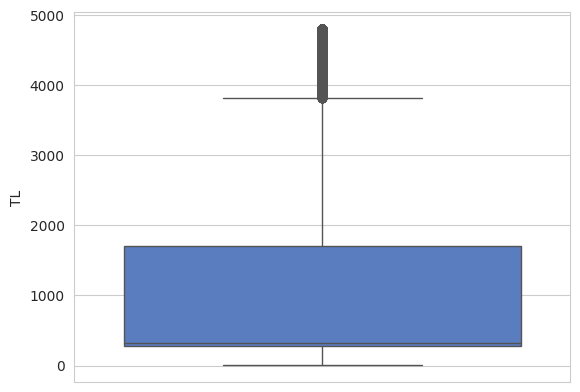

In [82]:
#Looking for outliers
box= sns.boxplot( y='TL', data=dataset)

#I found anomalies by inspecting boxplot but I didn't want to extract them from the data. Since there is a corona consideration which might causing outliers.

<Axes: xlabel='year', ylabel='TL'>

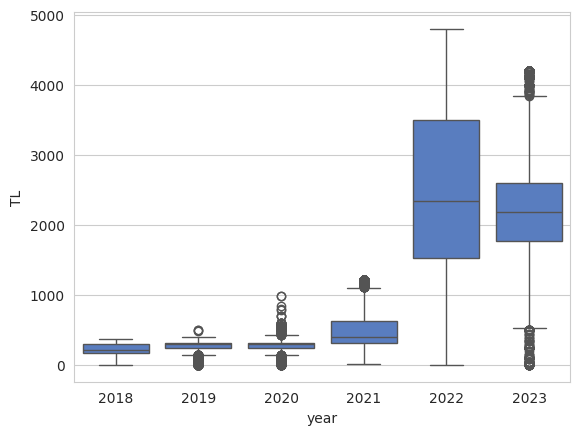

In [83]:
#Inspecting outliers by years might be give better ideas
sns.boxplot(x='year', y='TL', data=dataset)

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52154 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tarih     52154 non-null  datetime64[ns]
 1   Saat      52154 non-null  category      
 2   TL        52154 non-null  float64       
 3   EUR       52154 non-null  float64       
 4   Datetime  52154 non-null  datetime64[ns]
 5   day       52154 non-null  category      
 6   month     52154 non-null  category      
 7   year      52154 non-null  category      
dtypes: category(4), datetime64[ns](2), float64(2)
memory usage: 2.2 MB


In [85]:
#PANDEMİC OBSERVATIONS

covid_start = pd.to_datetime('2020-03-11')
covid_end = pd.to_datetime('2023-05-5')
dataset['covid_period'] = ((dataset['Tarih'] >= covid_start) & (dataset['Tarih'] <= covid_end)).astype(int)

dataset['period'] = pd.cut(dataset['Tarih'],
                      bins=[pd.Timestamp.min, covid_start, covid_end, pd.Timestamp.max],
                      labels=['Pre-COVID', 'COVID', 'Post-COVID']).astype('category')

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [86]:
dataset

,Tarih,Saat,TL,EUR,Datetime,day,month,year,covid_period,period
0,2018-01-01,0,207.60,45.97,2018-01-01 00:00:00,Monday,1,2018,0,Pre-COVID
1,2018-01-01,1,205.34,45.47,2018-01-01 01:00:00,Monday,1,2018,0,Pre-COVID
2,2018-01-01,2,164.94,36.53,2018-01-01 02:00:00,Monday,1,2018,0,Pre-COVID
3,2018-01-01,3,154.52,34.22,2018-01-01 03:00:00,Monday,1,2018,0,Pre-COVID
4,2018-01-01,4,112.64,24.95,2018-01-01 04:00:00,Monday,1,2018,0,Pre-COVID
...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31,19,2499.67,76.74,2023-12-31 19:00:00,Sunday,12,2023,0,Post-COVID
8756,2023-12-31,20,2472.34,75.90,2023-12-31 20:00:00,Sunday,12,2023,0,Post-COVID
8757,2023-12-31,21,2472.33,75.90,2023-12-31 21:00:00,Sunday,12,2023,0,Post-COVID
8758,2023-12-31,22,1800.00,55.26,2023-12-31 22:00:00,Sunday,12,2023,0,Post-COVID


In [87]:
#2 EXPLORATORY DATA ANALYSİS
#a

In [88]:
dataset.groupby('period')['TL'].agg(['mean', 'median', 'std', 'min', 'max'])


,mean,median,std,min,max
period,,,,,
Pre-COVID,254.125997,282.485,73.930555,5.01,500.0
COVID,1309.494557,636.000,1287.710260,5.01,4800.0
Post-COVID,2021.480575,2078.610,508.548267,10.00,2700.0


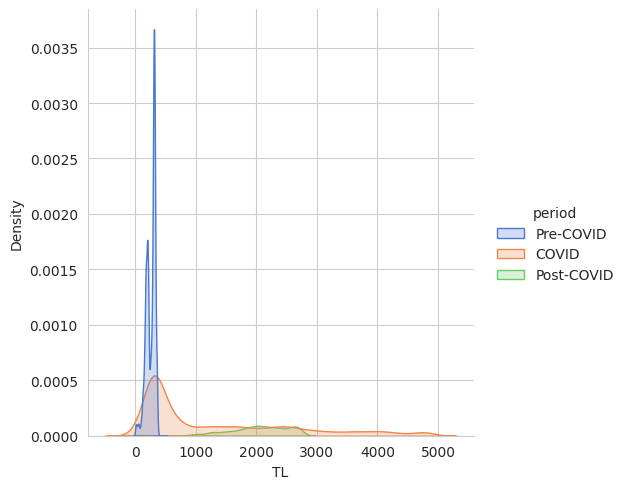

In [89]:
#b

sns.displot(data=dataset, x='TL', hue='period', kind='kde', fill=True)

<Axes: xlabel='period', ylabel='TL'>

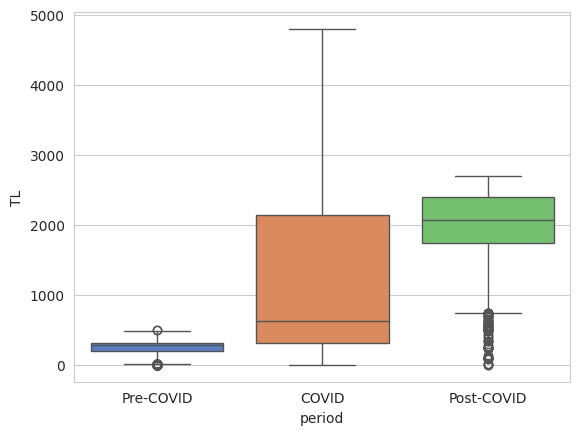

In [90]:
sns.boxplot(x='period', y='TL', data=dataset,hue ='period')

In [91]:
#c

#It makes more sense to inspect the effect of the calender variables on price seperately for each period since their distribution is significantly different


<Axes: xlabel='Saat', ylabel='TL'>

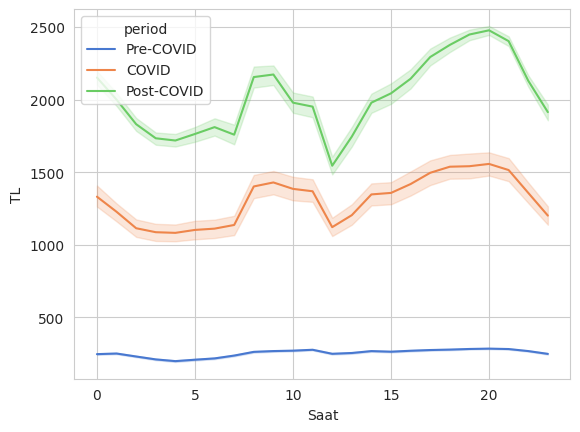

In [92]:
#Hour-of-day effect
sns.lineplot(data=dataset, x='Saat', y='TL', hue='period')

<Axes: xlabel='Saat', ylabel='TL'>

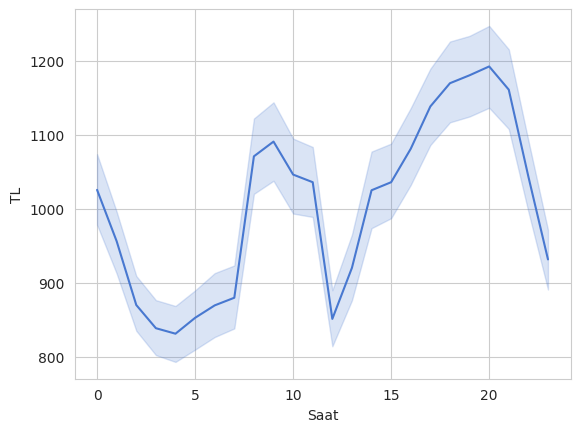

In [93]:
sns.lineplot(data=dataset, x='Saat', y='TL')

<Axes: xlabel='day', ylabel='TL'>

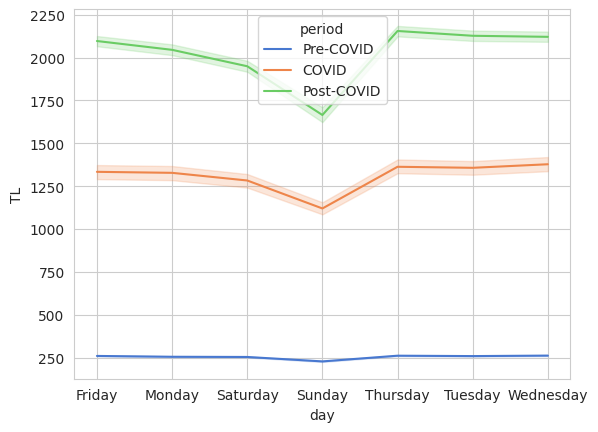

In [94]:
sns.lineplot(data=dataset, x='day', y='TL', hue='period')

<Axes: xlabel='day', ylabel='TL'>

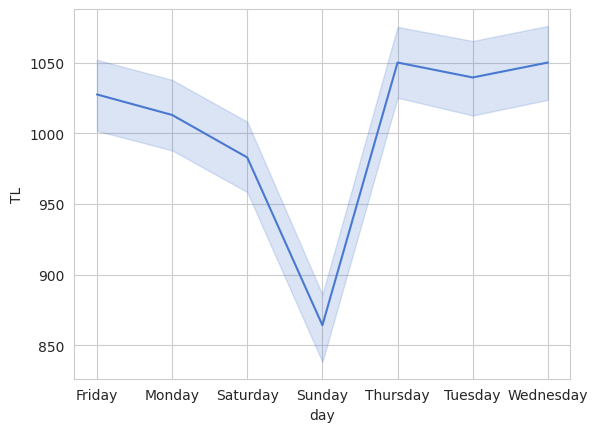

In [95]:
sns.lineplot(data=dataset, x='day', y='TL')

<Axes: xlabel='month', ylabel='TL'>

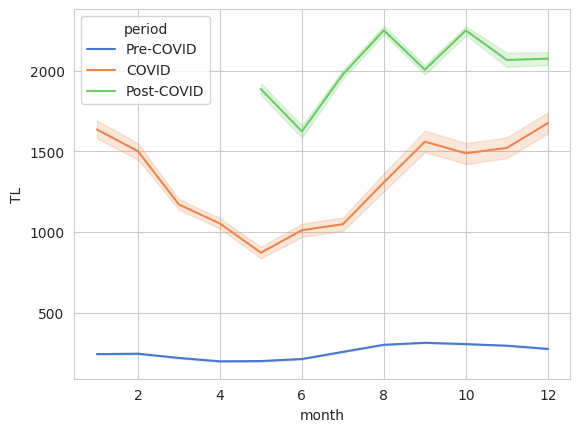

In [96]:
sns.lineplot(data=dataset, x='month', y='TL', hue='period')


<Axes: xlabel='month', ylabel='TL'>

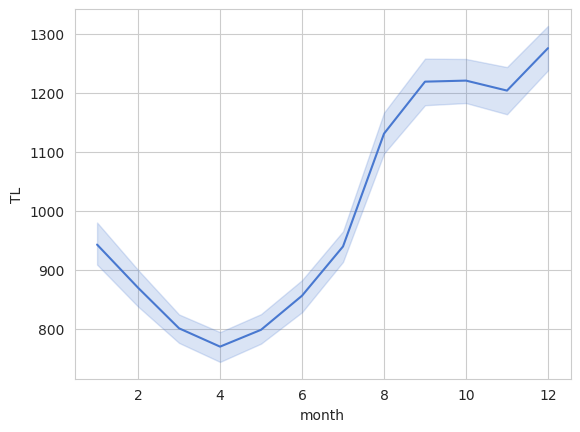

In [97]:
sns.lineplot(data=dataset, x='month', y='TL')

<Axes: xlabel='Saat', ylabel='TL'>

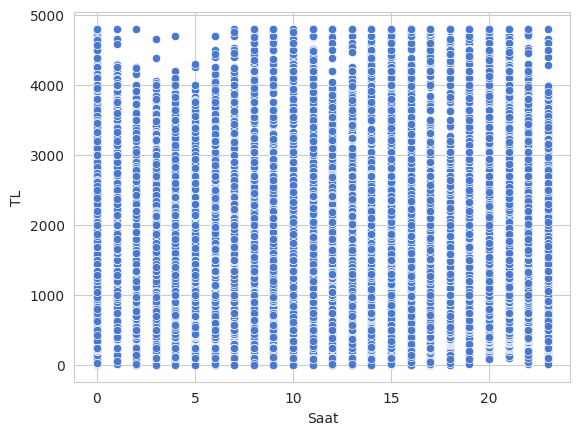

In [98]:
#Scatter plots doesnt seem so informative for categorical variables
sns.scatterplot(data=dataset, x='Saat', y='TL')

#Also heatmaps didn't calculate the correlation of the categorical variables but it's obvious the patters from the line plots

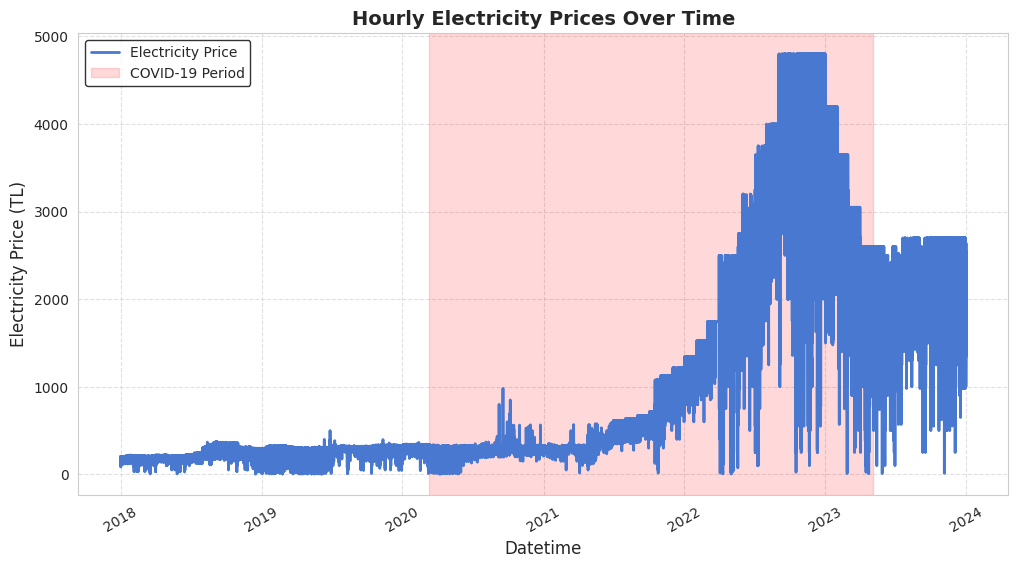

In [99]:
#d


sns.set_style("whitegrid")
sns.set_palette("muted")
color_palette = sns.color_palette()

# Datetime sütunu oluşturma

# Grafik boyutunu artırma
plt.figure(figsize=(12, 6))

# Çizgi grafiği
sns.lineplot(data=dataset, x='Datetime', y='TL', color=color_palette[0], linewidth=2, label='Electricity Price')

# COVID-19 dönemi için gölgelendirme
plt.axvspan(covid_start, covid_end, color='red', alpha=0.15, label="COVID-19 Period")

# Başlık ve etiketler
plt.title("Hourly Electricity Prices Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Electricity Price (TL)", fontsize=12)

# Izgara ve çerçeve ayarları
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)

# Göstergeyi düzenleme
plt.legend(loc='upper left', fontsize=10, frameon=True, edgecolor='black')

# Grafik gösterimi
plt.show()


In [100]:
dataset

,Tarih,Saat,TL,EUR,Datetime,day,month,year,covid_period,period
0,2018-01-01,0,207.60,45.97,2018-01-01 00:00:00,Monday,1,2018,0,Pre-COVID
1,2018-01-01,1,205.34,45.47,2018-01-01 01:00:00,Monday,1,2018,0,Pre-COVID
2,2018-01-01,2,164.94,36.53,2018-01-01 02:00:00,Monday,1,2018,0,Pre-COVID
3,2018-01-01,3,154.52,34.22,2018-01-01 03:00:00,Monday,1,2018,0,Pre-COVID
4,2018-01-01,4,112.64,24.95,2018-01-01 04:00:00,Monday,1,2018,0,Pre-COVID
...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31,19,2499.67,76.74,2023-12-31 19:00:00,Sunday,12,2023,0,Post-COVID
8756,2023-12-31,20,2472.34,75.90,2023-12-31 20:00:00,Sunday,12,2023,0,Post-COVID
8757,2023-12-31,21,2472.33,75.90,2023-12-31 21:00:00,Sunday,12,2023,0,Post-COVID
8758,2023-12-31,22,1800.00,55.26,2023-12-31 22:00:00,Sunday,12,2023,0,Post-COVID


In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52154 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tarih         52154 non-null  datetime64[ns]
 1   Saat          52154 non-null  category      
 2   TL            52154 non-null  float64       
 3   EUR           52154 non-null  float64       
 4   Datetime      52154 non-null  datetime64[ns]
 5   day           52154 non-null  category      
 6   month         52154 non-null  category      
 7   year          52154 non-null  category      
 8   covid_period  52154 non-null  int64         
 9   period        52154 non-null  category      
dtypes: category(5), datetime64[ns](2), float64(2), int64(1)
memory usage: 4.7 MB


In [102]:
#Regression Based Forecasting Model
#a

encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ["year", "Saat", "day", "month", "period"]
X = encoder.fit_transform(dataset[categorical_cols])

Y= dataset["TL"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

Y_Eur = dataset["EUR"]

train_X_Eur, test_X_Eur, train_Y_Eur, test_Y_Eur = train_test_split(X, Y_Eur, test_size=0.2,random_state=42)
train_X_Eur = sm.add_constant(train_X_Eur)
test_X_Eur = sm.add_constant(test_X_Eur)


In [103]:
data_lm = sm.OLS(train_Y, train_X).fit()

In [104]:
data_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TL   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     3552.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:09:30   Log-Likelihood:            -3.1878e+05
No. Observations:               41723   AIC:                         6.376e+05
Df Residuals:                   41675   BIC:                         6.381e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -254.2534     25.473     -9.981      0.000    -304.182    -204.325
x1            28.9694      8.570      3.380      0.001      12.172      45.767
x2           314.9693     15.950     19.747      0.000     283.706     346.232
x3           612.7884     18.758     32.667      0.000     576.022     649.555
x4          2612.3507     18.763    139.231      0.000    2575.575    2649.126
x5          2900.5589     21.809    132.999      0.000    2857.813    2943.305
x6           -69.0643     17.043     -4.052      0.000    -102.469     -35.659
x7          -154.2111     17.031     -9.055      0.000    -187.592    -120.830
x8          -187.6672     17.019    -11.027      0.000    -221.025    -154.310
x9          -205.7668     17.100    -12.033      0.000    -239.283    -172.251
x10         -176.5766     17.105    -10.323      0.000    -210.102    -143.051
x11         -175.8723     17.120    -10.273      0.000    -209.428    -142.317
x12         -153.1329     17.155     -8.927      0.000    -186.756    -119.510
x13           42.2063     17.039      2.477      0.013       8.810      75.602
x14           50.1252     17.185      2.917      0.004      16.442      83.809
x15           10.1352     17.198      0.589      0.556     -23.573      43.844
x16           -9.3199     17.130     -0.544      0.586     -42.894      24.255
x17         -175.5161     17.157    -10.230      0.000    -209.145    -141.888
x18         -120.1717     17.117     -7.020      0.000    -153.722     -86.621
x19           -3.0316     17.115     -0.177      0.859     -36.577      30.513
x20           -0.6986     17.063     -0.041      0.967     -34.142      32.745
x21           58.7929     17.068      3.445      0.001      25.340      92.246
x22          114.0537     17.033      6.696      0.000      80.668     147.440
x23          140.8782     17.043      8.266      0.000     107.474     174.282
x24          150.9420     17.034      8.861      0.000     117.556     184.328
x25          164.8988     17.029      9.684      0.000     131.522     198.275
x26          135.2612     17.062      7.927      0.000     101.818     168.704
x27           21.1732     17.092      1.239      0.215     -12.328      54.675
x28          -87.0831     17.002     -5.122      0.000    -120.408     -53.759
x29          -11.0183      9.208     -1.197      0.231     -29.067       7.030
x30          -50.5670      9.215     -5.488      0.000     -68.628     -32.506
x31         -188.0355      9.283    -20.255      0.000    -206.231    -169.840
x32           17.0705      9.211      1.853      0.064      -0.983      35.124
x33            6.9375      9.199      0.754      0.451     -11.093      24.967
x34           13.5597      9.225      1.470      0.142      -4.522      31.642
x35          -61.2732     12.233     -5.009      0.000     -85.251     -37.295
x3

In [105]:
#Euro predicting linear model
data_lm_eur = sm.OLS(train_Y_Eur, train_X_Eur).fit()
data_lm_eur.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EUR   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2410.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:09:30   Log-Likelihood:            -1.9436e+05
No. Observations:               41723   AIC:                         3.888e+05
Df Residuals:                   41675   BIC:                         3.892e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4379      1.291      4.211      0.000       2.907       7.969
x1             1.6035      0.434      3.691      0.000       0.752       2.455
x2            17.0304      0.809     21.063      0.000      15.446      18.615
x3            34.2313      0.951     35.999      0.000      32.367      36.095
x4           128.5298      0.951    135.136      0.000     126.666     130.394
x5           124.5241      1.106    112.638      0.000     122.357     126.691
x6            -3.0193      0.864     -3.495      0.000      -4.713      -1.326
x7            -8.7361      0.863    -10.119      0.000     -10.428      -7.044
x8           -11.3911      0.863    -13.204      0.000     -13.082      -9.700
x9           -12.9711      0.867    -14.964      0.000     -14.670     -11.272
x10          -11.1127      0.867    -12.816      0.000     -12.812      -9.413
x11          -11.2182      0.868    -12.927      0.000     -12.919      -9.517
x12           -8.8219      0.870    -10.145      0.000     -10.526      -7.117
x13            2.6298      0.864      3.045      0.002       0.937       4.323
x14            3.2447      0.871      3.725      0.000       1.537       4.952
x15            1.9339      0.872      2.218      0.027       0.225       3.643
x16            1.5218      0.868      1.753      0.080      -0.180       3.224
x17           -8.4484      0.870     -9.714      0.000     -10.153      -6.744
x18           -5.3681      0.868     -6.187      0.000      -7.069      -3.667
x19            1.2837      0.868      1.480      0.139      -0.417       2.984
x20            1.0078      0.865      1.165      0.244      -0.688       2.703
x21            4.2394      0.865      4.900      0.000       2.544       5.935
x22            7.2765      0.863      8.427      0.000       5.584       8.969
x23            9.1057      0.864     10.540      0.000       7.412      10.799
x24            9.9321      0.863     11.503      0.000       8.240      11.625
x25           10.8014      0.863     12.513      0.000       9.110      12.493
x26            9.1165      0.865     10.540      0.000       7.421      10.812
x27            2.5094      0.866      2.896      0.004       0.811       4.208
x28           -4.3311      0.862     -5.025      0.000      -6.020      -2.642
x29           -0.5980      0.467     -1.281      0.200      -1.513       0.317
x30           -2.8078      0.467     -6.011      0.000      -3.723      -1.892
x31          -11.0707      0.471    -23.526      0.000     -11.993     -10.148
x32            0.9543      0.467      2.044      0.041       0.039       1.869
x33            0.4030      0.466      0.864      0.387      -0.511       1.317
x34            0.8879      0.468      1.899      0.058      -0.029       1.805
x35           -2.3972      0.620     -3.866      0.000      -3.613      -1.182
x3

In [106]:
#Accuracy calculation
predictions = data_lm.predict(test_X)
mape = mean_absolute_percentage_error(test_Y, predictions)

r2 = r2_score(test_Y, predictions)
print(f"R-squared (R2): {r2}")

mape = mean_absolute_percentage_error(test_Y, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


R-squared (R2): 0.8069606850900848
Mean Absolute Percentage Error (MAPE): 0.8721046923073816


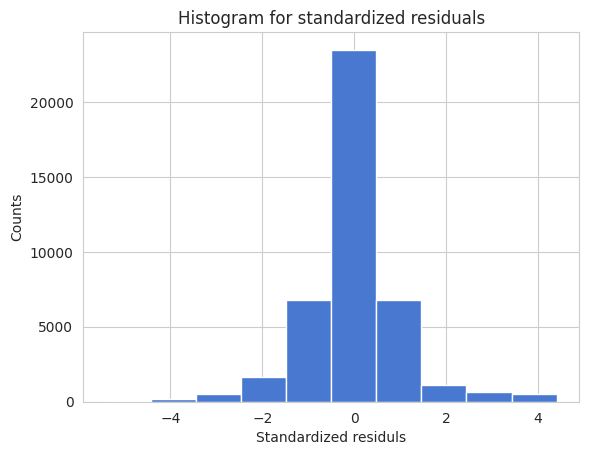

In [107]:
from scipy.stats import zscore
plt.hist(zscore(data_lm.resid))
plt.title( 'Histogram for standardized residuals' );
plt.xlabel( 'Standardized residuls' )
plt.ylabel( 'Counts' );

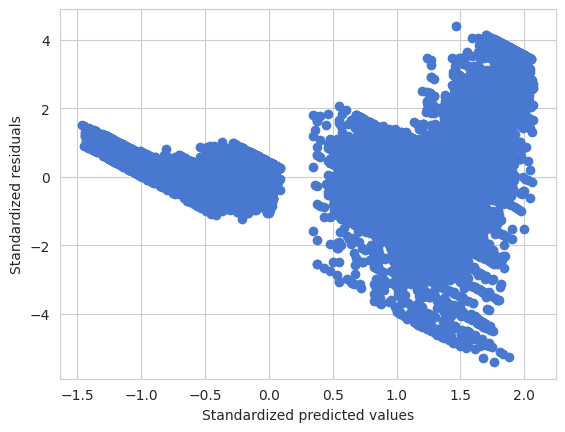

In [108]:
plt.scatter(zscore(data_lm.fittedvalues),zscore(data_lm.resid))
plt.xlabel( 'Standardized predicted values' )
plt.ylabel( 'Standardized residuals' );

In [109]:
predictions_eur = data_lm_eur.predict(test_X_Eur)
mape_eur = mean_absolute_percentage_error(test_Y_Eur, predictions)

r2_eur = r2_score(test_Y_Eur, predictions_eur)
print(f"R-squared (R2): {r2_eur}")

mape_eur = mean_absolute_percentage_error(test_Y_Eur, predictions_eur)
print(f"Mean Absolute Percentage Error (MAPE): {mape_eur}")


R-squared (R2): 0.7425575976208958
Mean Absolute Percentage Error (MAPE): 0.5499224742846734


In [110]:
# Without COVID indicated
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ["year", "Saat", "day", "month"]
X = encoder.fit_transform(dataset[categorical_cols])

Y= dataset["TL"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

data_lm = sm.OLS(train_Y, train_X).fit()

data_lm.summary()

predictions = data_lm.predict(test_X)

r2 = r2_score(test_Y, predictions)
print(f"R-squared (R2): {r2}")

mape = mean_absolute_percentage_error(test_Y, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

R-squared (R2): 0.7863922672032482
Mean Absolute Percentage Error (MAPE): 0.7626171492881788


In [111]:
#Better model- Suggestion
#After Adding relationships which I need seems necessary from the plots and dropped the unnecessary columns
dataset2 = dataset.copy(deep=True)
dataset2['period_month'] = dataset2['period'].astype(str) + "_" + dataset2['month'].astype(str)
dataset2['period_day'] = dataset2['period'].astype(str) + "_" + dataset2['day'].astype(str)
dataset2['period_hour'] = dataset2['period'].astype(str) + "_" + dataset2['Saat'].astype(str)

encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ["year",   "period_month", "period_day", "period_hour"]
X = encoder.fit_transform(dataset2[categorical_cols])

Y= dataset2["TL"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)


In [112]:
data_lm = sm.OLS(train_Y, train_X).fit()
data_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TL   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1658.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:09:35   Log-Likelihood:            -3.1534e+05
No. Observations:               41723   AIC:                         6.309e+05
Df Residuals:                   41599   BIC:                         6.320e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -243.1314     26.812     -9.068      0.000    -295.684    -190.578
x1            34.6452      7.903      4.384      0.000      19.156      50.135
x2           105.1384     15.724      6.686      0.000      74.319     135.958
x3           453.7710     17.872     25.391      0.000     418.742     488.800
x4          2452.5449     17.870    137.247      0.000    2417.520    2487.570
x5          2929.9810     20.311    144.254      0.000    2890.170    2969.791
x6           803.4162     16.133     49.801      0.000     771.796     835.037
x7           827.7497     16.290     50.815      0.000     795.822     859.677
x8           969.3076     16.108     60.177      0.000     937.736    1000.879
x9          -133.6882     15.947     -8.383      0.000    -164.944    -102.432
x10         -146.2079     14.916     -9.802      0.000    -175.443    -116.973
x11         -157.9135     14.845    -10.637      0.000    -187.011    -128.816
x12           50.7313     15.908      3.189      0.001      19.550      81.912
x13          315.1128     16.330     19.296      0.000     283.105     347.121
x14          354.8778     16.187     21.924      0.000     323.151     386.604
x15          614.3216     16.233     37.843      0.000     582.504     646.139
x16          850.0215     16.346     52.000      0.000     817.982     882.061
x17          -32.2423     20.169     -1.599      0.110     -71.773       7.289
x18         -253.2297     20.419    -12.402      0.000    -293.251    -213.209
x19         -204.6363     19.869    -10.299      0.000    -243.580    -165.693
x20         -395.1894     21.547    -18.341      0.000    -437.422    -352.957
x21         -653.9876     20.256    -32.286      0.000    -693.689    -614.286
x22         -297.0603     20.049    -14.816      0.000    -336.357    -257.763
x23          -39.8796     20.012     -1.993      0.046     -79.103      -0.656
x24         -286.3382     20.260    -14.133      0.000    -326.048    -246.628
x25          110.7875     12.687      8.733      0.000      85.921     135.654
x26          201.8934     15.634     12.914      0.000     171.250     232.537
x27          192.6777     15.736     12.245      0.000     161.835     223.520
x28          174.8534     15.537     11.254      0.000     144.400     205.307
x29          114.1106     13.028      8.759      0.000      88.575     139.646
x30          105.6068     14.191      7.442      0.000      77.792     133.422
x31           96.4618     15.925      6.057      0.000      65.249     127.675
x32           98.2681     15.921      6.172      0.000      67.063     129.473
x33          111.8494     16.018      6.983      0.000      80.454     143.245
x34          154.3493     15.498      9.959      0.000     123.973     184.725
x35          198.3556     15.638     12.684      0.000     167.704     229.007
x3

In [113]:
predictions = data_lm.predict(test_X)
r2 = r2_score(test_Y, predictions)
print(f"R-squared (R2): {r2}")

mape = mean_absolute_percentage_error(test_Y, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


R-squared (R2): 0.8368835328580163
Mean Absolute Percentage Error (MAPE): 0.760269408331388


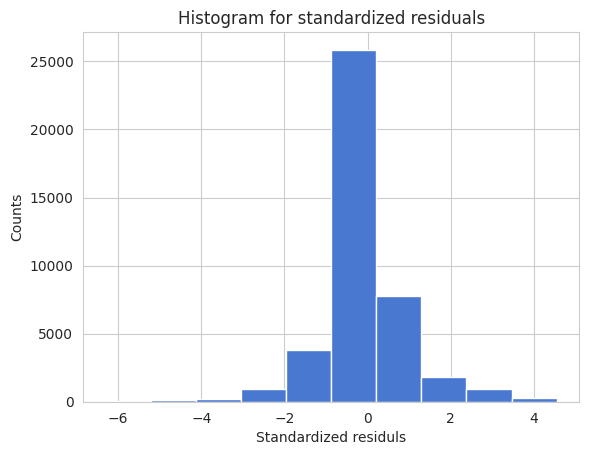

In [114]:
from scipy.stats import zscore
plt.hist(zscore(data_lm.resid))
plt.title( 'Histogram for standardized residuals' );
plt.xlabel( 'Standardized residuls' )
plt.ylabel( 'Counts' );

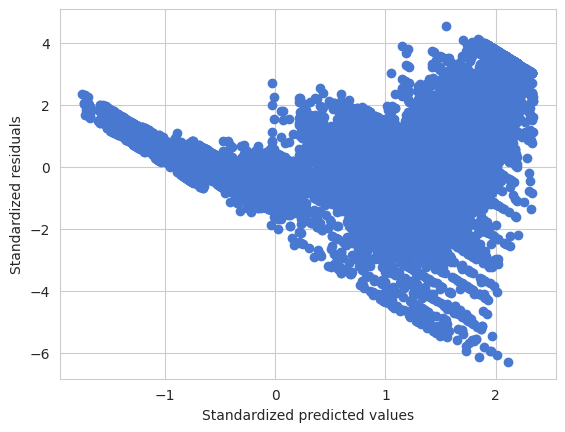

In [115]:
plt.scatter(zscore(data_lm.fittedvalues),zscore(data_lm.resid))
plt.xlabel( 'Standardized predicted values' )
plt.ylabel( 'Standardized residuals' );

BONUS PART - EXTRA CREDIT

In [116]:
!pip install meteostat


In [117]:
from meteostat import Point, Hourly
from datetime import datetime

location = Point(41.0082, 28.9784)

start = datetime(2018, 1, 1)
end = datetime(2024, 1, 1)

data = Hourly(location, start, end)
data = data.fetch()

print(data)

                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2018-01-01 00:00:00   7.8   4.9  82.0   NaN   NaN  240.0  14.8   NaN  1020.0   
2018-01-01 01:00:00   8.0   4.9  81.0   NaN   NaN  230.0  16.6   NaN  1019.0   
2018-01-01 02:00:00   8.0   4.9  81.0   NaN   NaN  220.0  16.6   NaN  1019.0   
2018-01-01 03:00:00   7.5   5.5  87.0   NaN   NaN  210.0  18.4   NaN  1019.5   
2018-01-01 04:00:00   8.0   6.0  87.0   NaN   NaN  210.0  18.4   NaN  1018.0   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2023-12-31 20:00:00  10.0   9.1  94.0   0.0   NaN    0.0   0.0   NaN  1020.0   
2023-12-31 21:00:00  11.5   9.6  88.0   0.0   NaN   80.0   3.6   NaN  1020.2   
2023-12-31 22:00:00  11.0   9.1  88.0   0.0   NaN   90.0   7.6   NaN  1019.0   
2023-12-31 23:00:00  12.0   9.0  82.0   0.0   NaN  100.0   9.4   NaN  1019.0   
2024-01-01 00:00:00  11.9   9.5  85.0   

In [118]:
weather_data = data[["temp", "rhum", "prcp", "wspd"]]

In [119]:
weather_data.replace([np.inf, -np.inf], 0, inplace=True)

# Replace NaN values with 0
weather_data = weather_data.fillna(0)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [120]:
weather_data.rename(columns={'prcp': 'Precipitation', 'temp':'Temperature', 'wspd':'WindSpeed ','rhum':'RelativeHumidity'}, inplace=True)


In [121]:
weather_data

,Temperature,RelativeHumidity,Precipitation,WindSpeed
time,,,,
2018-01-01 00:00:00,7.8,82.0,0.0,14.8
2018-01-01 01:00:00,8.0,81.0,0.0,16.6
2018-01-01 02:00:00,8.0,81.0,0.0,16.6
2018-01-01 03:00:00,7.5,87.0,0.0,18.4
2018-01-01 04:00:00,8.0,87.0,0.0,18.4
...,...,...,...,...
2023-12-31 20:00:00,10.0,94.0,0.0,0.0
2023-12-31 21:00:00,11.5,88.0,0.0,3.6
2023-12-31 22:00:00,11.0,88.0,0.0,7.6


In [122]:
dataset_ww = pd.merge(dataset, weather_data,  left_on='Datetime', right_on='time' ,how='left')

In [123]:
dataset_ww

,Tarih,Saat,TL,EUR,Datetime,day,month,year,covid_period,period,Temperature,RelativeHumidity,Precipitation,WindSpeed
0,2018-01-01,0,207.60,45.97,2018-01-01 00:00:00,Monday,1,2018,0,Pre-COVID,7.8,82.0,0.0,14.8
1,2018-01-01,1,205.34,45.47,2018-01-01 01:00:00,Monday,1,2018,0,Pre-COVID,8.0,81.0,0.0,16.6
2,2018-01-01,2,164.94,36.53,2018-01-01 02:00:00,Monday,1,2018,0,Pre-COVID,8.0,81.0,0.0,16.6
3,2018-01-01,3,154.52,34.22,2018-01-01 03:00:00,Monday,1,2018,0,Pre-COVID,7.5,87.0,0.0,18.4
4,2018-01-01,4,112.64,24.95,2018-01-01 04:00:00,Monday,1,2018,0,Pre-COVID,8.0,87.0,0.0,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52149,2023-12-31,19,2499.67,76.74,2023-12-31 19:00:00,Sunday,12,2023,0,Post-COVID,11.0,88.0,0.0,3.6
52150,2023-12-31,20,2472.34,75.90,2023-12-31 20:00:00,Sunday,12,2023,0,Post-COVID,10.0,94.0,0.0,0.0
52151,2023-12-31,21,2472.33,75.90,2023-12-31 21:00:00,Sunday,12,2023,0,Post-COVID,11.5,88.0,0.0,3.6
52152,2023-12-31,22,1800.00,55.26,2023-12-31 22:00:00,Sunday,12,2023,0,Post-COVID,11.0,88.0,0.0,7.6


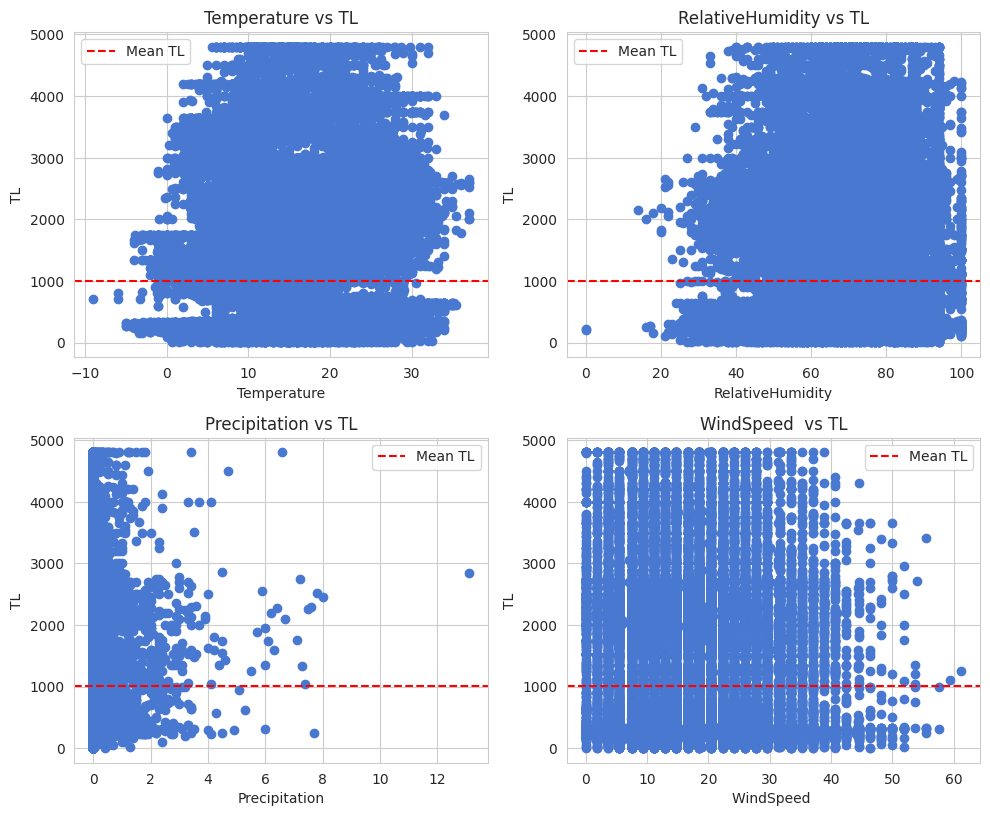

In [124]:
def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(dataset_ww[x], dataset_ww.TL)
    plt.title(x + ' vs TL')
    plt.ylabel('TL')
    plt.xlabel(x)
    mean_tl = dataset_ww['TL'].mean()
    plt.axhline(y=mean_tl, color='red', linestyle='--', label='Mean TL')
    plt.legend()

plt.figure(figsize=(10, 20))

scatter('Temperature', 1)
scatter('RelativeHumidity', 2)
scatter('Precipitation', 3)
scatter('WindSpeed ', 4)
plt.tight_layout()

In [125]:
dataset_ww['period_month'] = dataset_ww['period'].astype(str) + "_" + dataset_ww['month'].astype(str)
dataset_ww['period_day'] = dataset_ww['period'].astype(str) + "_" + dataset_ww['day'].astype(str)
dataset_ww['period_hour'] = dataset_ww['period'].astype(str) + "_" + dataset_ww['Saat'].astype(str)

encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ["year",   "period_month", "period_day", "period_hour"]
encoded = encoder.fit_transform(dataset_ww[categorical_cols])

numerical_cols = [ 'Temperature' ,'RelativeHumidity', 'Precipitation', 'WindSpeed ']
X = pd.concat([
    pd.DataFrame(encoded),
    dataset_ww[numerical_cols].reset_index(drop=True)
], axis=1)

Y= dataset_ww["TL"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

In [126]:
data_lm = sm.OLS(train_Y, train_X).fit()
data_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TL   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:09:55   Log-Likelihood:            -3.1515e+05
No. Observations:               41723   AIC:                         6.306e+05
Df Residuals:                   41595   BIC:                         6.317e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -258.3887     34.011     -7.597      0.000    -325.051    -191.726
0                   31.9847      7.881      4.059      0.000      16.539      47.431
1                   99.7065     15.659      6.367      0.000      69.014     130.399
2                  451.3290     17.825     25.321      0.000     416.393     486.265
3                 2452.7752     17.812    137.703      0.000    2417.863    2487.687
4                 2926.1084     20.226    144.668      0.000    2886.464    2965.753
5                  789.5797     17.735     44.520      0.000     754.818     824.341
6                  820.4053     16.815     48.790      0.000     787.447     853.363
7                  964.7616     16.245     59.390      0.000     932.922     996.601
8                 -131.1288     15.887     -8.254      0.000    -162.268     -99.990
9                 -144.9338     14.856     -9.756      0.000    -174.052    -115.815
10                -162.4514     15.123    -10.742      0.000    -192.092    -132.810
11                  37.4437     17.500      2.140      0.032       3.143      71.745
12                 293.4429     19.662     14.924      0.000     254.905     331.981
13                 361.0199     21.143     17.075      0.000     319.580     402.460
14                 610.9853     21.360     28.604      0.000     569.119     652.851
15                 845.2173     19.554     43.225      0.000     806.891     883.544
16                 -41.6389     20.345     -2.047      0.041     -81.516      -1.762
17                -228.6086     20.466    -11.170      0.000    -268.722    -188.495
18                -203.6655     19.976    -10.196      0.000    -242.818    -164.513
19                -387.4997     21.497    -18.025      0.000    -429.635    -345.364
20                -645.7069     20.901    -30.894      0.000    -686.673    -604.741
21                -289.8787     21.774    -13.313      0.000    -332.556    -247.202
22                 -13.9988     21.985     -0.637      0.524     -57.090      29.092
23                -258.7976     21.267    -12.169      0.000    -300.481    -217.114
24                 128.3897     13.512      9.502      0.000     101.907     154.873
25                 196.4321     16.040     12.246      0.000     164.993     227.871
26                 194.5285     15.718     12.376      0.000     163.720     225.337
27                 186.4670     15.839     11.773      0.000     155.423     217.511
28                 133.0535     13.658      9.742      0.000     106.283     159.824
29                 109.2400     14.344      7.616      0.000      81.126     137.354
30                  99.0886     15.930      6.220      0.000      67.865     130.312
31                  91.6718     16.453      5.572      0.000      59.424     123.920
32                 112.

In [127]:
predictions = data_lm.predict(test_X)
r2 = r2_score(test_Y, predictions)
print(f"R-squared (R2): {r2}")

mape = mean_absolute_percentage_error(test_Y, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


R-squared (R2): 0.8378400864720402
Mean Absolute Percentage Error (MAPE): 0.7844082835691629
